In [2]:
import numpy as np
import pandas as pd
import glob
import os
import random


import datetime
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from pyextremes import plot_mean_residual_life



In [11]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"

sensor_ID = '10309' #'10066'

import plotly.express as px

# Create a DataFrame with your data
#     # 10066
# data = {'Lat': [41.60],  # get from ERO portal
#         'Lon': [-87.90]}  # get from ERO portal (given in degrees W)

#     # 10187
# data = {'Lat': [41.],  # get from ERO portal
#         'Lon': [-81.6]}  # get from ERO portal (given in degrees W)

#     # 10188
# data = {'Lat': [40.2],  # get from ERO portal
#         'Lon': [-74.5]}  # get from ERO portal (given in degrees W)

#     # 10107
# data = {'Lat': [34.50],  # get from ERO portal
#         'Lon': [-118.10]}  # get from ERO portal (given in degrees W)

#     # 10397
# data = {'Lat': [39.10],  # get from ERO portal
#         'Lon': [-78.30]}  # get from ERO portal (given in degrees W)

#     # 10202
# data = {'Lat': [34.9],  # get from ERO portal
#         'Lon': [-90.]}  # get from ERO portal (given in degrees W)

    # some problematic sensors
data = {'Lat': [33.3, 37.20, 41.20,44.4,42.3,41.7,45.8,40.70,47.4,40.20],  # get from ERO portal
        'Lon': [-111.9, -86.90, -87.9,-88.4,-87.9,-87.5,-88.,-74.,-101.2,-74.50],
        'sensor':[10196,10198,10085,10307,10077,10075,10309,10377,10257,10188]}  # get from ERO portal (given in degrees W)



df_locale = pd.DataFrame(data)


# Create a scatter_geo trace
fig = px.scatter_geo(df_locale, lat='Lat', lon='Lon', scope='usa', hover_name='sensor')
fig.update_traces(marker=dict(size=10))  # Adjust the size as needed

# # Customize the map layout if needed
# fig.update_geos(
#     center={'lat': 37.0902, 'lon': -95.7129},  # Center of the United States
#     projection_scale=5  # Adjust the scale as needed
# )

# Show the plot
fig.show()




In [5]:
df_s = pd.read_csv('/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/figures/sensor_IDs_EVA/df_'+str(sensor_ID)+'.csv')
df_s['datetimes'] = pd.to_datetime(df_s['datetimes'])
df_s.set_index('datetimes', inplace=True)



import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.subplots import make_subplots




fig = make_subplots(rows=1, cols=1,shared_xaxes=True,)

fig.add_trace(go.Scatter(
                    x=df_s.index,
                    y=df_s[sensor_ID].values,
                    mode='markers',
                    name=sensor_ID
                  ), 
              row=1, col=1)


# fig.update_xaxes(range=[df_s.index[0], df.index[-1]])




array([2015, 2017])

In [ ]:
df_s[st[-9:-4]].values[np.isfinite(df_s[st[-9:-4]].values)]

In [6]:
# Loop over random set of stations and create cumulative density function/survival function

list_sensor_dfs = glob.glob('/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/figures/sensor_IDs_EVA/*.csv')

colormap = plt.get_cmap('viridis')

# Define the number of colors you want
num_colors = 10

# Generate a list of evenly spaced values between 0 and 1
values = np.linspace(0, 1, num_colors)

# Get colors from the colormap at the specified values
colors = [colormap(value) for value in values]


fig = go.Figure()

nbins = 50

for s,color in enumerate(colors):
    print(s,color)
    
    # Choose station at random
    st = random.choice(list_sensor_dfss)
    print('station = {}'.format(st[-9:-4]))
    
    df_s = pd.read_csv(st)
    df_s['datetimes'] = pd.to_datetime(df_s['datetimes'])
    df_s.set_index('datetimes', inplace=True)
    
    # getting data of the histogram
    count, bins_count = np.histogram(df_s[st[-9:-4]].values[np.isfinite(df_s[st[-9:-4]].values)], bins=nbins)

    # finding the PDF of the histogram using count values
    pdf = count / sum(count)

    # using numpy np.cumsum to calculate the CDF
    # We can also find using the PDF values by looping and adding
    cdf = np.cumsum(pdf)
    sf = 1-cdf

    
    fig.add_trace(go.Scatter(x=bins_count[1:], y=sf, mode='lines+markers', name=st[-9:-4], ))#marker_color=color))

fig.update_yaxes(type="log")    
fig.show()    


0 (0.267004, 0.004874, 0.329415, 1.0)


NameError: name 'list_sensor_dfss' is not defined

In [7]:
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.timeseries import TimeSeries
from sunpy.time import TimeRange as tr


# get solar wind and geomagnetic activity index data and look at relationship
trange = a.Time(np.min(df_s.index),np.max(df_s.index))
dataset = a.cdaweb.Dataset('OMNI_HRO2_1MIN')
result = Fido.search(trange, dataset)
downloaded_files = Fido.fetch(result[0])
print(downloaded_files)

sw_data = TimeSeries(downloaded_files, concatenate=True)
df_SW = sw_data.to_dataframe()
df_SW['datetimes'] = df_SW.index

Files Downloaded:   0%|          | 0/10 [00:00<?, ?file/s]

omni_hro2_1min_20151101_v01.cdf:   0%|          | 0.00/8.76M [00:00<?, ?B/s]

omni_hro2_1min_20150801_v01.cdf:   0%|          | 0.00/8.77M [00:00<?, ?B/s]

['/Users/ryanmc/sunpy/data/omni_hro2_1min_20150301_v01.cdf', '/Users/ryanmc/sunpy/data/omni_hro2_1min_20150401_v01.cdf', '/Users/ryanmc/sunpy/data/omni_hro2_1min_20150501_v01.cdf', '/Users/ryanmc/sunpy/data/omni_hro2_1min_20150601_v01.cdf', '/Users/ryanmc/sunpy/data/omni_hro2_1min_20150701_v01.cdf', '/Users/ryanmc/sunpy/data/omni_hro2_1min_20150801_v01.cdf', '/Users/ryanmc/sunpy/data/omni_hro2_1min_20150901_v01.cdf', '/Users/ryanmc/sunpy/data/omni_hro2_1min_20151001_v01.cdf', '/Users/ryanmc/sunpy/data/omni_hro2_1min_20151101_v01.cdf', '/Users/ryanmc/sunpy/data/omni_hro2_1min_20151201_v01.cdf']


In [8]:
Esw = []
Bz = []
Vsw = []
Psw = []
AE = []
SymH = []


for i in df_s.index:
    #get closest solar wind datetime value
    idx_loop = pd.Series(abs(df_SW.index - i)).idxmin()

    Esw.append(df_SW['E'].values[idx_loop])
    Vsw.append(df_SW['flow_speed'].values[idx_loop])
    Psw.append(df_SW['Pressure'].values[idx_loop])
    Bz.append(df_SW['BZ_GSM'].values[idx_loop])
    AE.append(df_SW['AE_INDEX'].values[idx_loop])
    SymH.append(df_SW['SYM_H'].values[idx_loop])
    

In [9]:
df_merged = df_s.copy()

df_merged['Esw'] = Esw
df_merged['Vsw'] = Vsw
df_merged['Psw'] = Psw
df_merged['Bz'] = Bz
df_merged['AE'] = AE
df_merged['SymH'] = SymH

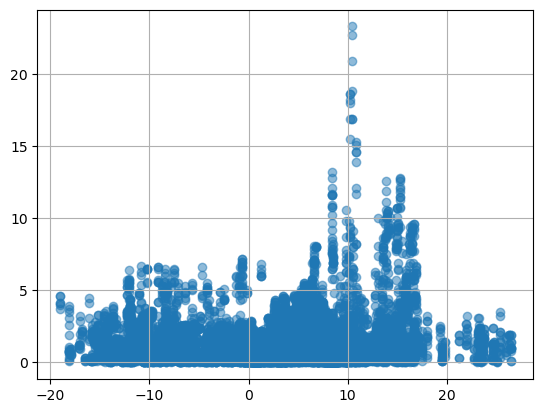

In [10]:
plt.figure()
plt.scatter(df_merged['Esw'],df_merged['10309'],alpha=0.5)
plt.grid(True)
# plt.xscale('log')


In [76]:
# Temporary: looking at GNSS data for saturation 
gnss_dir = '/Users/ryanmc/Library/CloudStorage/OneDrive-JPL/Documents/NASA_JPL/Projects/SpontaneousRTD_2023/data/TECdata/2015/chur/'
gnss_file = 'tec_chur150317.txt'

f = open(os.path.join(gnss_dir,gnss_file), 'r')
lines = f.readlines()
    
count = 0
gnss_data = []
for line in lines:
    if count == 0:
        gnss_columns = line.split('  ')
    else:
        gnss_data.append(line.split())
    count += 1
        
df_gnss = pd.DataFrame(data=gnss_data,columns=gnss_columns)

year = 2015
month = 3
day = 17
dts_gnss = [datetime(year,month,day,int(float(d))) for d in df_gnss['Time, hrs'].values]
df_gnss['datetimes'] = pd.to_datetime(dts_gnss)
df_gnss.set_index('datetimes', inplace=True)




In [77]:
df_gnss

Time, hrs   Sta    Sat           Az          El  \
datetimes                                                               
2015-03-17 23:00:00  23.9955556  CHUR  GPS43  325.1668033  12.7168101   
2015-03-17 23:00:00  23.9955556  CHUR  GPS44  244.8139106  16.4785088   
2015-03-17 23:00:00  23.9955556  CHUR  GPS48  215.4371575  79.8995988   
2015-03-17 23:00:00  23.9955556  CHUR  GPS56   71.0652525  22.5777847   
2015-03-17 23:00:00  23.9955556  CHUR  GPS59  122.9688561  52.7672202   
...                         ...   ...    ...          ...         ...   
2015-03-17 23:00:00  23.7122222  CHUR  GPS56   69.6407347   27.979816   
2015-03-17 23:00:00  23.7205556  CHUR  GPS56   69.6893154  27.7698246   
2015-03-17 23:00:00  23.7288889  CHUR  GPS56   69.7384823  27.5600272   
2015-03-17 23:00:00  23.7372222  CHUR  GPS56   69.7882294  27.3504243   
2015-03-17 23:00:00  23.7455556  CHUR  GPS56   69.8385503  27.1410167   

                            Lat           Lon   STEC,TECU   VTEC,TECU  \
datetimes                                                               
2015-03-17 23:00:00  67.4784586  -112.1310218  61.3306528  25.2003189   
2015-03-17 23:00:00  53.2194004   -109.573191  45.9653305  20.4673377   
2015-03-17 23:00:00  58.0312937   -94.8497933  20.3919303  20.1239461   
2015-03-17 23:00:00  60.3219189   -78.5232133  32.7478797  16.5525411   
2015-03-17 23:00:00  56.9345248   -89.6100271  24.6628363  20.3663821   
...                         ...           ...         ...         ...   
2015-03-17 23:00:00  60.3189496   -81.4140063  17.2864821   9.7598699   
2015-03-17 23:00:00  60.3212927   -81.3149818  17.6389753   9.9175947   
2015-03-17 23:00:00  60.3234783   -81.2150734  17.9974465   10.077093   
2015-03-17 23:00:00  60.3255034   -81.1142718  18.3160036  10.2127416   
2015-03-17 23:00:00  60.3273651   -81.0125678  18.6188006  10.3382382   

                    GIMResiduals\n  
datetimes                           
2015-03-17 23:00:00     -9.3949824  
2015-03-17 23:00:00      0.3230324  
2015-03-17 23:00:00     -0.1034031  
2015-03-17 23:00:00       3.633673  
2015-03-17 23:00:00     -1.1538385  
...                            ...  
2015-03-17 23:00:00      2.7597344  
2015-03-17 23:00:00      2.4180227  
2015-03-17 23:00:00      2.0708396  
2015-03-17 23:00:00      1.7641042  
2015-03-17 23:00:00      1.4736794  

[18728 rows x 10 columns]

In [78]:

# get solar wind and geomagnetic activity index data and look at relationship
trange = a.Time(np.min(df_gnss.index),np.max(df_gnss.index))
dataset = a.cdaweb.Dataset('OMNI_HRO2_1MIN')
result = Fido.search(trange, dataset)
downloaded_files = Fido.fetch(result[0])
print(downloaded_files)

sw_data2 = TimeSeries(downloaded_files, concatenate=True)
df_SW_gnss = sw_data2.to_dataframe()
df_SW_gnss['datetimes'] = df_SW_gnss.index

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

['/Users/ryanmc/sunpy/data/omni_hro2_1min_20150301_v01.cdf']


In [79]:
Esw = []
Bz = []
Vsw = []
Psw = []
AE = []
SymH = []


for i in df_gnss.index:
    #get closest solar wind datetime value
    idx_loop = pd.Series(abs(df_SW.index - i)).idxmin()

    Esw.append(df_SW['E'].values[idx_loop])
    Vsw.append(df_SW['flow_speed'].values[idx_loop])
    Psw.append(df_SW['Pressure'].values[idx_loop])
    Bz.append(df_SW['BZ_GSM'].values[idx_loop])
    AE.append(df_SW['AE_INDEX'].values[idx_loop])
    SymH.append(df_SW['SYM_H'].values[idx_loop])

In [80]:
df_gnss_merged = df_gnss.copy()

df_gnss_merged['Esw'] = Esw
df_gnss_merged['Vsw'] = Vsw
df_gnss_merged['Psw'] = Psw
df_gnss_merged['Bz'] = Bz
df_gnss_merged['AE'] = AE
df_gnss_merged['SymH'] = SymH

In [ ]:
STEC = [float(t) for t in df_gnss_merged['STEC,TECU'].values]

In [90]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Create a figure
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# Add the GIC scatter
fig.add_trace(go.Scatter(x=df_merged['Esw'], y=df_merged['10309'].values, mode='markers', name='GIC'), row=1, col=1)

# Add the GNSS scatter
fig.add_trace(go.Scatter(x=df_gnss_merged['Esw'], y=STEC, mode='markers', name='GNSS'), row=2, col=1)
